In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn import tree
import numpy as np
import re
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("BenignAndMaliciousDataset.csv")

In [3]:
df.dtypes

Domain                   int64
DNSRecordType           object
MXDnsResponse             bool
TXTDnsResponse            bool
HasSPFInfo                bool
HasDkimInfo               bool
HasDmarcInfo              bool
Ip                       int64
DomainInAlexaDB           bool
CommonPorts               bool
CountryCode             object
RegisteredCountry       object
CreationDate             int64
LastUpdateDate           int64
ASN                      int64
HttpResponseCode         int64
RegisteredOrg           object
SubdomainNumber          int64
Entropy                  int64
EntropyOfSubDomains      int64
StrangeCharacters        int64
TLD                     object
IpReputation              bool
DomainReputation          bool
ConsoantRatio          float64
NumericRatio           float64
SpecialCharRatio       float64
VowelRatio             float64
ConsoantSequence         int64
VowelSequence            int64
NumericSequence          int64
SpecialCharSequence      int64
DomainLe

In [4]:
df.describe()

,Domain,Ip,CreationDate,LastUpdateDate,ASN,HttpResponseCode,SubdomainNumber,Entropy,EntropyOfSubDomains,StrangeCharacters,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,44999.500000,13479.648033,1.933611,2.365744,23335.808167,0.667033,103.069200,2.866844,0.003178,3.498011,0.459519,0.144281,0.006526,0.261528,2.719222,1.342756,1.516478,0.112378,26.440422,0.500000
std,25980.906451,4160.266410,1.997232,1.935509,37004.865724,1.203285,4243.802846,0.488291,0.081042,4.471591,0.146031,0.147331,0.026162,0.098600,1.699339,0.554527,1.538932,0.431967,22.341135,0.500003
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,22499.750000,11709.750000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.200000,2.000000,1.000000,0.000000,0.000000,15.000000,0.000000
50%,44999.500000,14626.000000,0.000000,4.000000,26228.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.500000,0.100000,0.000000,0.200000,2.000000,1.000000,1.000000,0.000000,24.000000,0.500000
75%,67499.250000,16984.000000,4.000000,4.000000,26228.000000,2.000000,57.000000,3.000000,0.000000,7.000000,0.600000,0.300000,0.000000,0.300000,3.000000,2.000000,3.000000,0.000000,31.000000,1.000000
max,89999.000000,16984.000000,4.000000,4.000000,398108.000000,5.000000,661909.000000,5.000000,3.000000,124.000000,1.000000,0.800000,0.900000,0.800000,37.000000,7.000000,45.000000,61.000000,153.000000,1.000000


In [5]:
len(df.loc[df['Class'] == 0])

45000

In [6]:
len(df.loc[df['Class'] == 1])

45000

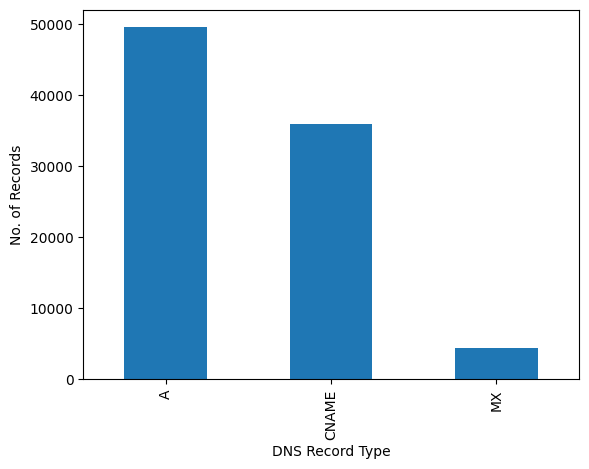

In [7]:
# How many of each record type?
record_count = df.groupby(['DNSRecordType']).size()
record_count.plot.bar()
plt.xlabel('DNS Record Type')
plt.ylabel('No. of Records')
plt.show()

In [ ]:
# Training on 6 features -----------------------------

dt = pd.read_csv('BenignAndMaliciousDataset.csv')
dt = dt.drop('Domain', axis=1)

In [4]:
# Convert objects to dummy variables
dt = pd.get_dummies(dt, drop_first=True)
y = dt['Class']
X = dt.drop('Class', axis=1)
X = X[['StrangeCharacters', 'NumericSequence', 'NumericRatio', 'DomainLength','HasSPFInfo','HasDmarcInfo']]

In [5]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)
'''
model = RandomForestClassifier(max_depth=5, 
                               n_estimators=30,
                               min_samples_split=100, 
                               max_leaf_nodes=5,
                               random_state=123)
'''
model = SVC(probability=True,random_state=42)

model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [9]:
# Predict on test set
y_pred = model.predict(X_test)


Accuracy: 0.934
Precision: 0.913
Recall: 0.96
F1: 0.936


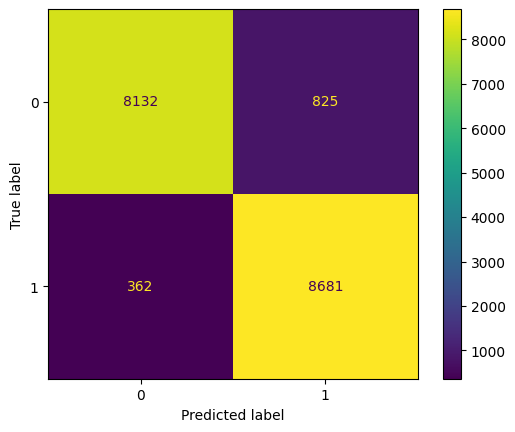

In [10]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
print("F1:", round(f1,3))

In [6]:
#Make new predictions ------------------------------------------------

def getStrangeCharacters(domain): #Function taken from the paper DNS firewall based on machine learning (2021)
    try:
        domain = re.sub(r'[a-zA-Z\.]+', '', domain)
        if len(domain) > 0:
            digits = sum(char.isdigit() for char in domain)
            digits = 0 if digits <= 2 else digits - 2
            domain = re.sub(r'[0-9]+', '', domain)
            return len(domain) + digits
        return 0
    except Exception as e:
        print("Error on getStrangeCharacters(): " + str(e))
        return 0

def which_is_higher(dt, feature): #A function for comparing attributes
    benign = dt.loc[dt['Class'] == 0, feature].mean()
    malicious = dt.loc[dt['Class'] == 1, feature].mean()
    if benign < malicious:
        print('For the variable ' + feature + ', the MALICIOUS domains have a higher mean value')
    else:
        print('For the variable ' + feature + ', the BENIGN domains have a higher mean value')



In [7]:
import dns.resolver
import tldextract

def check_root_domain_records(domain):
    """Extract organizational domain and check its records"""
    extracted = tldextract.extract(domain)
    root_domain = f"{extracted.domain}.{extracted.suffix}"
    return check_spf_dmarc(root_domain)


def check_spf_dmarc(domain):
    """
    Check if a domain has SPF and DMARC records.
    Returns a tuple of booleans (has_spf, has_dmarc).
    """
    spf_exists = False
    dmarc_exists = False

    # Check SPF record (in TXT records of the domain)
    try:
        answers = dns.resolver.resolve(domain, 'TXT')
        for record in answers:
            txt_data = b''.join(record.strings).decode('utf-8')
            if txt_data.startswith('v=spf1'):
                spf_exists = True
                break
    except (dns.resolver.NoAnswer, dns.resolver.NXDOMAIN, dns.resolver.NoNameservers):
        pass
    except Exception as e:
        print(f"SPF check error: {e}")

    # Check DMARC record (in TXT records of _dmarc subdomain)
    try:
        dmarc_domain = f'_dmarc.{domain}'
        answers = dns.resolver.resolve(dmarc_domain, 'TXT')
        for record in answers:
            txt_data = b''.join(record.strings).decode('utf-8')
            if txt_data.startswith('v=DMARC1'):
                dmarc_exists = True
                break
    except (dns.resolver.NoAnswer, dns.resolver.NXDOMAIN, dns.resolver.NoNameservers):
        pass
    except Exception as e:
        print(f"DMARC check error: {e}")

    return spf_exists, dmarc_exists

In [14]:
which_is_higher(dt, 'StrangeCharacters')
which_is_higher(dt, 'NumericSequence')
which_is_higher(dt, 'NumericRatio')
which_is_higher(dt, 'DomainLength')
which_is_higher(dt, 'HasSPFInfo')
which_is_higher(dt, 'HasDmarcInfo')


For the variable StrangeCharacters, the MALICIOUS domains have a higher mean value
For the variable NumericSequence, the MALICIOUS domains have a higher mean value
For the variable NumericRatio, the MALICIOUS domains have a higher mean value
For the variable DomainLength, the MALICIOUS domains have a higher mean value
For the variable HasSPFInfo, the MALICIOUS domains have a higher mean value
For the variable HasDmarcInfo, the BENIGN domains have a higher mean value


<Axes: title={'center': 'HasDmarcInfo'}, xlabel='[Class]'>

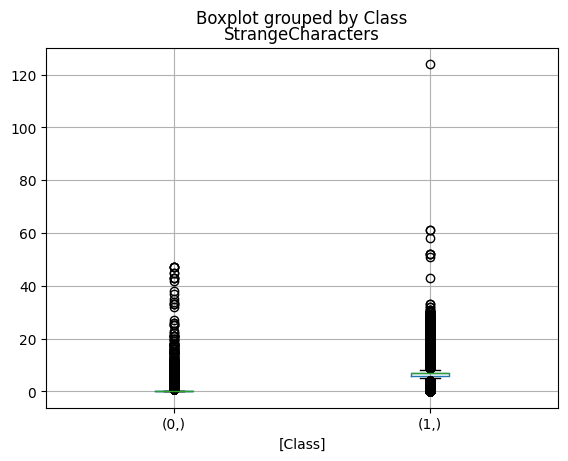

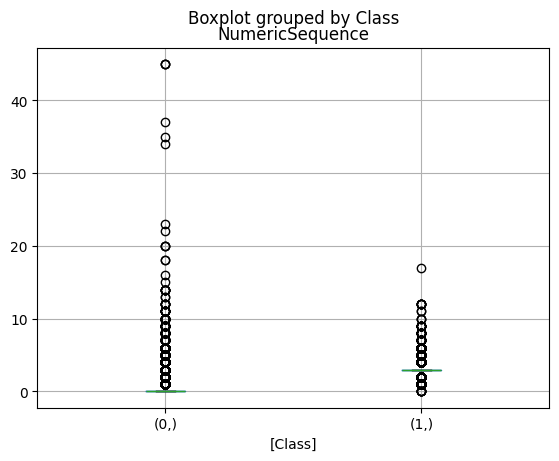

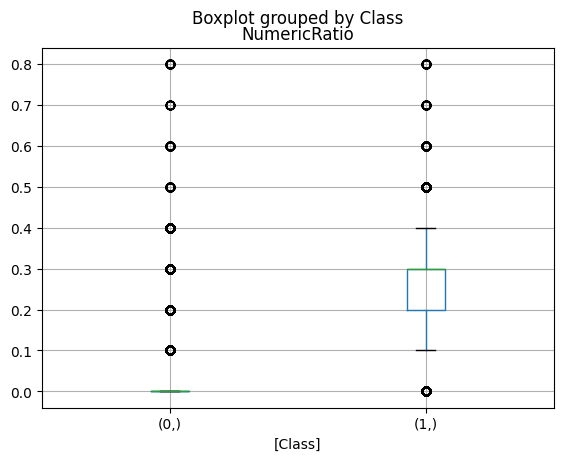

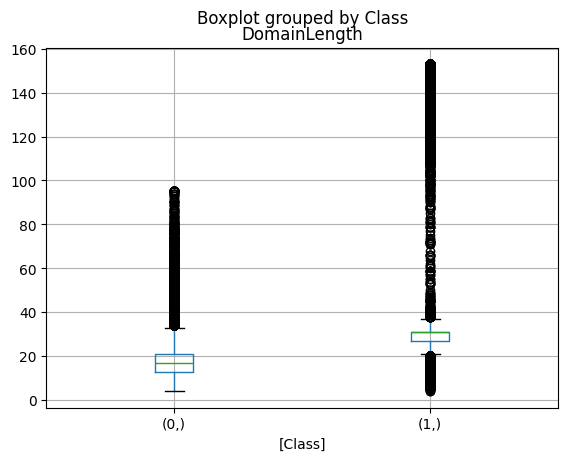

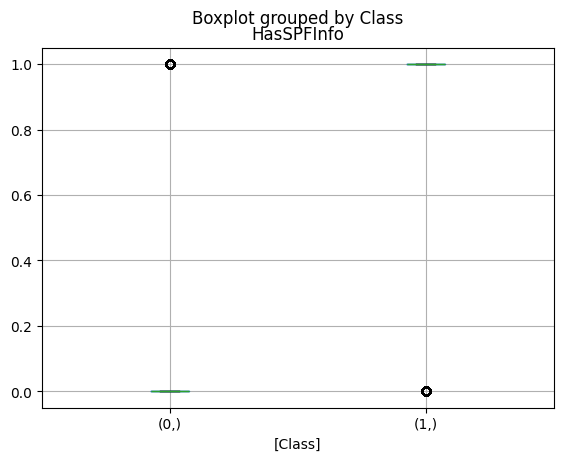

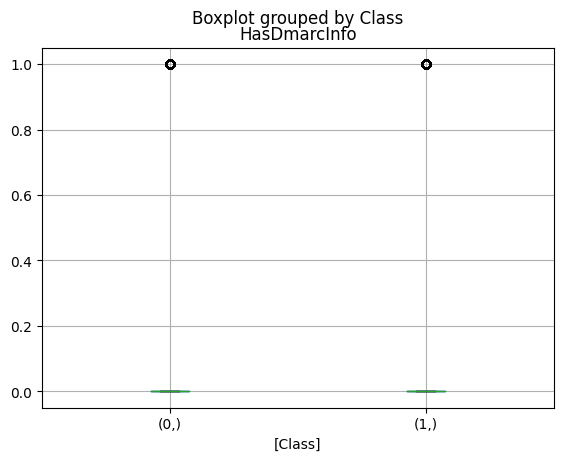

In [15]:
#Some boxplots
dt.boxplot(column=['StrangeCharacters'], by=['Class']) #Malicious have more
dt.boxplot(column=['NumericSequence'], by=['Class']) #Malicious have more
dt.boxplot(column=['NumericRatio'], by=['Class']) #Malicious have more
dt.boxplot(column=['DomainLength'], by=['Class']) #Malicious have more
dt.boxplot(column=['HasSPFInfo'], by=['Class']) #Malicious have less
dt.boxplot(column=['HasDmarcInfo'], by=['Class']) #Malicious have less


In [8]:
def predict_single_case(domain): #Predict new domains

    #StrangeCharacters
    StrangeCharacters = getStrangeCharacters(domain)
    #NumericSequence
    digits = re.findall(r"\d+", domain)
    NumericSequence = len(max(digits, default=[], key=len)) 
    #NumericRatio
    NumericRatio = sum(c.isdigit() for c in domain) / len(domain) 
    #DomainLength
    DomainLength = len(domain)
    #HasSPFInfo
    HasSPFInfo, HasDmarcInfo = check_root_domain_records(domain)
    
    # initialize list of lists
    data = [[StrangeCharacters, NumericSequence, NumericRatio, DomainLength, HasSPFInfo, HasDmarcInfo]]
    single_test = pd.DataFrame(data, columns=['StrangeCharacters', 'NumericSequence', 'NumericRatio', 'DomainLength', 'HasSPFInfo', 'HasDmarcInfo'])
       
    print(single_test)
    
    # Predict
    domain_pred = model.predict(single_test)
    domain_pred_proba_benign = round(model.predict_proba(single_test)[0][0],3)
    domain_pred_proba_malicious = round(model.predict_proba(single_test)[0][1],3)
    if domain_pred == 0:
        print('I predict that ' + domain + ' is benign (' + str(domain_pred_proba_benign) + ')')
    if domain_pred == 1:
        print('I predict that ' + domain + ' is malicious (' + str(domain_pred_proba_malicious) + ')')

In [15]:
domain = 'www.rain-pipe-cleaning-4530.bond'
predict_single_case(domain)

   StrangeCharacters  NumericSequence  NumericRatio  DomainLength  HasSPFInfo  \
0                  5                4         0.125            32       False   

   HasDmarcInfo  
0         False  
I predict that www.rain-pipe-cleaning-4530.bond is malicious (0.877)


In [32]:
import joblib

In [33]:
joblib.dump(model, "DNS_MALICIOUS_PREDICTION_SVM.pkl")

['DNS_MALICIOUS_PREDICTION_SVM.pkl']